34350
34332
34332
34341
34346


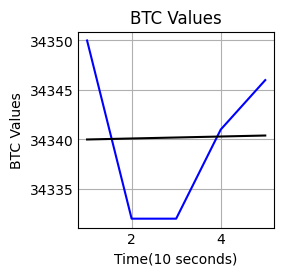

34357
34348
34349
34349
34349


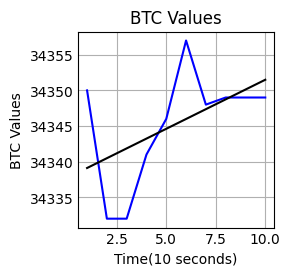

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1764\3963894444.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom = hatakaresipolinom + (float(yla[i])-float(polinommodel.predict(xlan)[i]))**2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1764\3963894444.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatakaresipolinom = hatakaresipolinom + (float(yla[i])-float(polinommodel.predict(xlan)[i]))**2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1764\3963894444.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your ar

error of 1 degree polinomal 423.95151515160535
error of 2 degree polinomal 847.7818181818252
error of 3 degree polinomal 1096.9995337995688
error of 4 degree polinomal 1152.6731934732604
error of 5 degree polinomal 1199.3006993007405
error of 6 degree polinomal 1237.6312354313088
error of 7 degree polinomal 1273.715233785847
error of 8 degree polinomal 1306.1614699028328
error of 9 degree polinomal 1306.1614711995187
error of 10 degree polinomal 1306.1614711995355
error of 11 degree polinomal 1306.1614711995385
error of 12 degree polinomal 1306.1614711995385
error of 13 degree polinomal 1306.1614711996028
error of 14 degree polinomal 1306.1614712012877
error of 15 degree polinomal 1306.1614712578087
34349
34349
34349
34388
34389


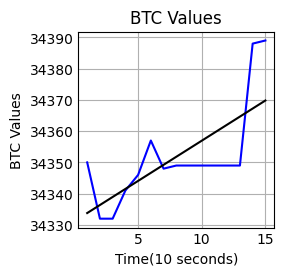

34389
34386


KeyboardInterrupt: 

In [2]:
import statsmodels as sm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from time import sleep
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

chromeOptions = webdriver.ChromeOptions() 
chromeOptions.add_argument("--incognito")
chromeOptions.add_argument("--headless")
driver = webdriver.Chrome(options=chromeOptions)
driver.maximize_window()
driver.delete_all_cookies()
driver.get("https://tr.tradingview.com/chart/?symbol=BITSTAMP%3ABTCUSD")
driver.implicitly_wait(10)
x = 0
xl = []
yl = []
while True:
    fiyat_bilgisi = driver.find_element("xpath", "/html/body/div[2]/div[6]/div/div[2]/div[1]/div[1]/div[2]/div[2]/div/div[2]/div[2]/span[1]/span[1]").text
    print(fiyat_bilgisi)
    sleep(10)
    x += 1
    xl.append(x)
    yl.append(int(fiyat_bilgisi))
    minha = 1
    ls = []
    if x % 5 == 0:
        plt.plot(xl,yl, color = "blue")
        plt.style.use('_mpl-gallery')
        plt.title("BTC Values")
        plt.xlabel("Time(10 seconds)")
        plt.ylabel("BTC Values")
        xla = np.array(xl).reshape(x,1)
        yla = np.array(yl).reshape(x,1)
        tahminpolinom = PolynomialFeatures(degree = minha)
        xlan = tahminpolinom.fit_transform(xla)
        polinommodel = LinearRegression()
        polinommodel.fit(xlan, yla)
        polinommodel.predict(xlan)
        plt.plot(xla, polinommodel.predict(xlan), c = "black")
        plt.show()
    if x % 10 == 0:
        hatakaresipolinom = 0
        for a in range(15):
            tahminpolinom = PolynomialFeatures(degree=a+1)
            xlan = tahminpolinom.fit_transform(xla)

            polinommodel = LinearRegression()
            polinommodel.fit(xlan, yla)
            polinommodel.predict(xlan)
            for i in range(x):
                hatakaresipolinom = hatakaresipolinom + (float(yla[i])-float(polinommodel.predict(xlan)[i]))**2
            print("error of",a+1, "degree polinomal", hatakaresipolinom)
            ls.append(hatakaresipolinom)
        minha = min(ls)
    if x % 31 == 0:
        driver.refresh()
    
        
